In [21]:
import timm

In [22]:
model=timm.create_model('resnet18', pretrained=True)
import torch
x=torch.randn(2, 3, 224, 224)
model(x).shape
model.forward_features(x).shape
y=model.forward_intermediates(x)

In [23]:
model = timm.create_model('mobilenetv3_large_100', pretrained=True, num_classes=10)

In [26]:
import torch
import torch.onnx
model=model.eval()

In [27]:
torch.onnx.export(model, x, "mobilenetv3_large_100.onnx", verbose=True)

In [28]:
import onnxruntime as ort
ort_session = ort.InferenceSession("mobilenetv3_large_100.onnx")

ort_inputs={ort_session.get_inputs()[0].name: x.numpy()}
ort_outs = ort_session.run(None, ort_inputs)

In [29]:
ort_outs

[array([[ 2.217774  ,  1.5519787 , -0.22444859,  0.7592643 ,  0.961927  ,
         -0.3114974 , -0.08623648,  0.359645  ,  0.21477658, -0.75887996],
        [ 2.5206194 ,  1.6517403 , -0.29994643,  0.7737431 ,  0.5924535 ,
          0.12534808, -0.47290525,  0.14639573, -0.03407793, -1.3731933 ]],
       dtype=float32)]

In [30]:
t_y=model(x)

In [31]:
import numpy as np

np.testing.assert_allclose(t_y.detach().numpy(), ort_outs[0], rtol=1e-01, atol=1e-1)

In [19]:
t_y.detach().numpy()

array([[-7.142563 , -8.189471 , -5.151391 , ..., -7.3517528, -6.735279 ,
        -7.148267 ],
       [-7.5918875, -7.38251  , -8.671149 , ..., -7.5795927, -8.036585 ,
        -6.4098034]], dtype=float32)

In [20]:
ort_outs

[array([[-7.6738873, -7.986134 , -7.000673 , ..., -7.2188826, -7.074541 ,
         -6.6318755],
        [-7.378369 , -7.7288613, -6.7491007, ..., -7.0367503, -7.094784 ,
         -6.681987 ]], dtype=float32)]

In [2]:
from trainingapi.model.detection.rotated_faster_rcnn import rotated_faster_rcnn_resnet_fpn
model = rotated_faster_rcnn_resnet_fpn(True, False, 5, 5, [1,2,3,4], False, "resnet50", anchor_sizes=((8), (16), (32), (64), (128)), aspect_ratios=((0.5, 1.0, 2.0),) * 5,angles=((0, 60, 120, 180, 240, 300),) * 5,)

[Builder] Skipped loading parameter rpn.head.cls_logits.weight due to incompatible shapes: torch.Size([18, 256, 1, 1]) vs torch.Size([3, 256, 1, 1])
[Builder] Skipped loading parameter rpn.head.cls_logits.bias due to incompatible shapes: torch.Size([18]) vs torch.Size([3])
[Builder] Skipped loading parameter rpn.head.bbox_pred.weight due to incompatible shapes: torch.Size([108, 256, 1, 1]) vs torch.Size([12, 256, 1, 1])
[Builder] Skipped loading parameter rpn.head.bbox_pred.bias due to incompatible shapes: torch.Size([108]) vs torch.Size([12])
[Builder] Skipped loading parameter roi_heads.box_predictor.cls_score.weight due to incompatible shapes: torch.Size([5, 1024]) vs torch.Size([91, 1024])
[Builder] Skipped loading parameter roi_heads.box_predictor.cls_score.bias due to incompatible shapes: torch.Size([5]) vs torch.Size([91])
[Builder] Skipped loading parameter roi_heads.box_predictor.obbox_pred.weight which is not in the model's state dict.
[Builder] Skipped loading parameter roi_

In [5]:
import torch
input = torch.rand(4, 3, 224, 224, device="cuda")
model.eval().cuda()
out = model(input)


In [8]:
from trainingapi.model.detection.rotated_faster_rcnn import rotated_faster_rcnn_mobilenetv3_large
returned_layers =[1,2,3,4]
model = rotated_faster_rcnn_mobilenetv3_large(True, False, 5, 5, returned_layers, True, anchor_sizes=((8, 16, 32, 64, 128),) * (len(returned_layers)+1), aspect_ratios=((0.5, 1.0, 2.0),) * (len(returned_layers)+1),angles=((0, 60, 120, 180, 240, 300),) * (len(returned_layers)+1),)

[Builder] Skipped loading parameter backbone.body.0.1.num_batches_tracked which is not in the model's state dict.
[Builder] Skipped loading parameter backbone.body.1.block.0.1.num_batches_tracked which is not in the model's state dict.
[Builder] Skipped loading parameter backbone.body.1.block.1.1.num_batches_tracked which is not in the model's state dict.
[Builder] Skipped loading parameter backbone.body.2.block.0.1.num_batches_tracked which is not in the model's state dict.
[Builder] Skipped loading parameter backbone.body.2.block.1.1.num_batches_tracked which is not in the model's state dict.
[Builder] Skipped loading parameter backbone.body.2.block.2.1.num_batches_tracked which is not in the model's state dict.
[Builder] Skipped loading parameter backbone.body.3.block.0.1.num_batches_tracked which is not in the model's state dict.
[Builder] Skipped loading parameter backbone.body.3.block.1.1.num_batches_tracked which is not in the model's state dict.
[Builder] Skipped loading parame

In [11]:
model.state_dict().keys()

odict_keys(['backbone.body.0.0.weight', 'backbone.body.0.1.weight', 'backbone.body.0.1.bias', 'backbone.body.0.1.running_mean', 'backbone.body.0.1.running_var', 'backbone.body.0.1.num_batches_tracked', 'backbone.body.1.block.0.0.weight', 'backbone.body.1.block.0.1.weight', 'backbone.body.1.block.0.1.bias', 'backbone.body.1.block.0.1.running_mean', 'backbone.body.1.block.0.1.running_var', 'backbone.body.1.block.0.1.num_batches_tracked', 'backbone.body.1.block.1.0.weight', 'backbone.body.1.block.1.1.weight', 'backbone.body.1.block.1.1.bias', 'backbone.body.1.block.1.1.running_mean', 'backbone.body.1.block.1.1.running_var', 'backbone.body.1.block.1.1.num_batches_tracked', 'backbone.body.2.block.0.0.weight', 'backbone.body.2.block.0.1.weight', 'backbone.body.2.block.0.1.bias', 'backbone.body.2.block.0.1.running_mean', 'backbone.body.2.block.0.1.running_var', 'backbone.body.2.block.0.1.num_batches_tracked', 'backbone.body.2.block.1.0.weight', 'backbone.body.2.block.1.1.weight', 'backbone.bo

In [1]:
from trainingapi.model.detection.rotated_faster_rcnn import rotated_faster_rcnn_resnet50_fpn

In [19]:
model=rotated_faster_rcnn_resnet50_fpn(
    pretrained=True,
    pretrained_backbone=False,
    num_classes=10,
    trainable_backbone_layers=5,
    returned_layers=[1,2,3,4],
    anchor_sizes=((8, 16, 32, 64, 128),) * 5, 
    aspect_ratios=((0.5, 1.0, 2.0),) * 5,
    angles=((0, 60, 120, 180, 240, 300),) * 5,
    freeze_bn=False)

 

[WARN] Skipped loading parameter backbone.fpn.inner_blocks.0.0.bias due to incompatible shapes: required shape is torch.Size([256])
[WARN] Skipped loading parameter backbone.fpn.inner_blocks.1.0.bias due to incompatible shapes: required shape is torch.Size([256])
[WARN] Skipped loading parameter backbone.fpn.inner_blocks.2.0.bias due to incompatible shapes: required shape is torch.Size([256])
[WARN] Skipped loading parameter backbone.fpn.inner_blocks.3.0.bias due to incompatible shapes: required shape is torch.Size([256])
[WARN] Skipped loading parameter backbone.fpn.layer_blocks.0.0.bias due to incompatible shapes: required shape is torch.Size([256])
[WARN] Skipped loading parameter backbone.fpn.layer_blocks.1.0.bias due to incompatible shapes: required shape is torch.Size([256])
[WARN] Skipped loading parameter backbone.fpn.layer_blocks.2.0.bias due to incompatible shapes: required shape is torch.Size([256])
[WARN] Skipped loading parameter backbone.fpn.layer_blocks.3.0.bias due to i

In [25]:
print(model.__str__())


RotatedFasterRCNN(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2

In [1]:

from trainingapi.data.datasets.mvtec import MVTecDataset
train_data = MVTecDataset(
    load_image_paths_kwargs=dict(
        image_folder = "D:/datasets/mvtec/train/images"
    ),
    load_anns_kwargs=dict(
        ann_folder = "D:/datasets/mvtec/train/annfiles"
    )
)
image, label = train_data[0]
image = image.permute(1, 2, 0)


c:\Users\admin\Desktop\workspace\trainingapi\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['D:/datasets/mvtec/train/images\\screws_001.png', 'D:/datasets/mvtec/train/images\\screws_002.png', 'D:/datasets/mvtec/train/images\\screws_003.png', 'D:/datasets/mvtec/train/images\\screws_004.png', 'D:/datasets/mvtec/train/images\\screws_005.png', 'D:/datasets/mvtec/train/images\\screws_006.png', 'D:/datasets/mvtec/train/images\\screws_007.png', 'D:/datasets/mvtec/train/images\\screws_008.png', 'D:/datasets/mvtec/train/images\\screws_009.png', 'D:/datasets/mvtec/train/images\\screws_012.png', 'D:/datasets/mvtec/train/images\\screws_013.png', 'D:/datasets/mvtec/train/images\\screws_014.png', 'D:/datasets/mvtec/train/images\\screws_015.png', 'D:/datasets/mvtec/train/images\\screws_016.png', 'D:/datasets/mvtec/train/images\\screws_017.png', 'D:/datasets/mvtec/train/images\\screws_018.png', 'D:/datasets/mvtec/train/images\\screws_019.png', 'D:/datasets/mvtec/train/images\\screws_021.png', 'D:/datasets/mvtec/train/images\\screws_022.png', 'D:/datasets/mvtec/train/images\\screws_023.png',

Loading annotations: 100%|██████████| 307/307 [00:00<00:00, 7972.18it/s]


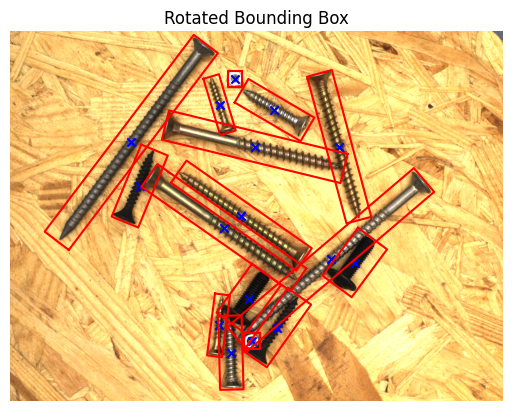

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_rotated_bounding_box(bbox):
    cx, cy, w, h, a = bbox

    angle_rad = torch.deg2rad(a)

    half_w, half_h = w / 2, h / 2
    center = torch.tensor([cx, cy])
    vector1 = torch.tensor([half_w * torch.cos(angle_rad), -half_w * torch.sin(angle_rad)])
    vector2 = torch.tensor([-half_h * torch.sin(angle_rad), -half_h * torch.cos(angle_rad)])
    
    point1 = center + vector1 + vector2
    point2 = center + vector1 - vector2
    point3 = center - vector1 - vector2
    point4 = center - vector1 + vector2

    poly = torch.stack([point1, point2, point3, point4, point1], dim=0)
    plt.plot(poly[:, 0].numpy(), poly[:, 1].numpy(), 'r-')  # Plot the box with red line
    plt.scatter(cx, cy, color='blue', marker='x')  # Mark the center

plt.figure()
plt.axis('off')
plt.title('Rotated Bounding Box')
plt.imshow(image, origin='upper')  # Assume grayscale image


# plot_rotated_bounding_box(image, label['oboxes'][index])
for b in label['oboxes']:
    plot_rotated_bounding_box(b)
plt.show()

In [1]:
from trainingapi.data.modules.vision import VisionDataModule

from trainingapi.data.datasets.mvtec import MVTecDataset
from torchvision.transforms import v2 as T
import torch
t = T.Compose([
    T.ToDtype(torch.float32, scale=True),
])
dm = VisionDataModule(
    MVTecDataset, 
    train_kwargs=dict(
        load_image_paths_kwargs=dict(
            image_folder = "D:/datasets/mvtec/train/images"
        ),
        load_anns_kwargs=dict(
            ann_folder = "D:/datasets/mvtec/train/annfiles"
        ),
        transforms = t
    ),
    test_kwargs=dict(
        load_image_paths_kwargs=dict(
            image_folder = "D:/datasets/mvtec/test/images"
        ),
        load_anns_kwargs=dict(
            ann_folder = "D:/datasets/mvtec/test/annfiles"
        ),
        transforms = t
    ),
    batch_size = 8,
    shuffle = True,
    num_workers = 2,
    pin_memory = True,
    drop_last = False,
    persistent_workers = False, 
)

c:\Users\admin\Desktop\workspace\trainingapi\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dm.setup("fit")

['D:/datasets/mvtec/train/images\\screws_001.png', 'D:/datasets/mvtec/train/images\\screws_002.png', 'D:/datasets/mvtec/train/images\\screws_003.png', 'D:/datasets/mvtec/train/images\\screws_004.png', 'D:/datasets/mvtec/train/images\\screws_005.png', 'D:/datasets/mvtec/train/images\\screws_006.png', 'D:/datasets/mvtec/train/images\\screws_007.png', 'D:/datasets/mvtec/train/images\\screws_008.png', 'D:/datasets/mvtec/train/images\\screws_009.png', 'D:/datasets/mvtec/train/images\\screws_012.png', 'D:/datasets/mvtec/train/images\\screws_013.png', 'D:/datasets/mvtec/train/images\\screws_014.png', 'D:/datasets/mvtec/train/images\\screws_015.png', 'D:/datasets/mvtec/train/images\\screws_016.png', 'D:/datasets/mvtec/train/images\\screws_017.png', 'D:/datasets/mvtec/train/images\\screws_018.png', 'D:/datasets/mvtec/train/images\\screws_019.png', 'D:/datasets/mvtec/train/images\\screws_021.png', 'D:/datasets/mvtec/train/images\\screws_022.png', 'D:/datasets/mvtec/train/images\\screws_023.png',

Loading annotations: 100%|██████████| 307/307 [00:00<00:00, 9302.23it/s]


['D:/datasets/mvtec/test/images\\screws_010.png', 'D:/datasets/mvtec/test/images\\screws_011.png', 'D:/datasets/mvtec/test/images\\screws_020.png', 'D:/datasets/mvtec/test/images\\screws_027.png', 'D:/datasets/mvtec/test/images\\screws_042.png', 'D:/datasets/mvtec/test/images\\screws_046.png', 'D:/datasets/mvtec/test/images\\screws_049.png', 'D:/datasets/mvtec/test/images\\screws_051.png', 'D:/datasets/mvtec/test/images\\screws_055.png', 'D:/datasets/mvtec/test/images\\screws_056.png', 'D:/datasets/mvtec/test/images\\screws_059.png', 'D:/datasets/mvtec/test/images\\screws_062.png', 'D:/datasets/mvtec/test/images\\screws_063.png', 'D:/datasets/mvtec/test/images\\screws_064.png', 'D:/datasets/mvtec/test/images\\screws_066.png', 'D:/datasets/mvtec/test/images\\screws_067.png', 'D:/datasets/mvtec/test/images\\screws_070.png', 'D:/datasets/mvtec/test/images\\screws_074.png', 'D:/datasets/mvtec/test/images\\screws_075.png', 'D:/datasets/mvtec/test/images\\screws_089.png', 'D:/datasets/mvtec/

Loading annotations: 100%|██████████| 77/77 [00:00<00:00, 9550.27it/s]


In [3]:
td = dm.train_dataloader()

In [4]:
import time
tic=time.time()
for i,l in td:
    tac = time.time()
    print(tac-tic)
    tic = tac

6.522987127304077
0.17157340049743652
0.10369038581848145
0.10750937461853027
0.23809432983398438
0.17497491836547852
0.222853422164917
0.1570723056793213
0.2227482795715332
0.17270922660827637
0.20448708534240723
0.18576741218566895
0.20682263374328613
0.19669771194458008
0.21378469467163086
0.15762591361999512
0.2266981601715088
0.16033101081848145
0.2264995574951172
0.17499923706054688
0.221602201461792
0.17731642723083496
0.21927666664123535
0.16369032859802246
0.22404956817626953
0.1561295986175537
0.23387575149536133
0.15817713737487793
0.2254955768585205
0.17919445037841797
0.24058961868286133
0.13831853866577148
0.25414395332336426
0.14118361473083496
0.24648523330688477
0.15276646614074707
0.2489628791809082
0.16651153564453125
0.0005040168762207031


In [1]:
import numpy as np
import torch

def get_rotated_vertices(box):
    # box는 (x_ctr, y_ctr, w, h, a)의 튜플 또는 배열로 주어진다.
    x_ctr, y_ctr, w, h, a = box

    # 각도를 라디안으로 변환
    theta = a * (np.pi / 180.0)
    cosTheta2 = np.cos(theta) * 0.5
    sinTheta2 = np.sin(theta) * 0.5

    # 꼭짓점 계산
    pts = np.zeros((4, 2))
    pts[0, 0] = x_ctr + sinTheta2 * h + cosTheta2 * w
    pts[0, 1] = y_ctr + cosTheta2 * h - sinTheta2 * w
    pts[1, 0] = x_ctr - sinTheta2 * h + cosTheta2 * w
    pts[1, 1] = y_ctr - cosTheta2 * h - sinTheta2 * w
    pts[2, 0] = 2 * x_ctr - pts[0, 0]
    pts[2, 1] = 2 * y_ctr - pts[0, 1]
    pts[3, 0] = 2 * x_ctr - pts[1, 0]
    pts[3, 1] = 2 * y_ctr - pts[1, 1]

    return pts
def obb2poly(obboxes):
    center, w, h, theta = torch.split(obboxes, [2, 1, 1, 1], dim=-1)
    theta = torch.deg2rad(theta)
    Cos, Sin = torch.cos(theta), torch.sin(theta)
    vector1 = torch.cat([w / 2 * Cos, -w / 2 * Sin], dim=-1)
    vector2 = torch.cat([-h / 2 * Sin, -h / 2 * Cos], dim=-1)
    point1 = center + vector1 + vector2
    point2 = center + vector1 - vector2
    point3 = center - vector1 - vector2
    point4 = center - vector1 + vector2
    poly = torch.cat([point1, point2, point3, point4], dim=-1)
    return poly

# 테스트 입력
box = (50.0, 50.0, 40.0, 20.0, 30.0)  # x_ctr, y_ctr, w, h, a

# numpy를 사용하여 C++ 변환 코드 실행
pts_cpp = get_rotated_vertices(box)

# PyTorch 텐서를 사용하여 obb2poly 실행
obbox_tensor = torch.tensor([50.0, 50.0, 40.0, 20.0, 30.0], dtype=torch.float32).unsqueeze(0)
pts_torch = obb2poly(obbox_tensor).numpy().reshape(-1, 2)

# 결과 비교
print("C++ Converted (Python) Points:")
print(pts_cpp)

print("\nPyTorch Points:")
print(pts_torch)


C++ Converted (Python) Points:
[[72.32050808 48.66025404]
 [62.32050808 31.33974596]
 [27.67949192 51.33974596]
 [37.67949192 68.66025404]]

PyTorch Points:
[[62.32051  31.339746]
 [72.32051  48.660255]
 [37.679493 68.660255]
 [27.679493 51.339745]]
